# Linear Regression

In this I python notebook we will focus on $\textit{Linear Regression}$ task. We will solve problem using <b>Tensorflow</b> machine learning framework
<img src="data_files/title_plot.jpg" height="40%" width="40%">

# Problem

This type of problem is called $\textit{Supervised learning}$ problem

Training set contains $N$ data points $(x_i, y_i) \: \mid \: x_i \in \mathbb{R}^{d_1}, y_i \in \mathbb{R}^{d_2}, i = 1, \dots, N $. 

For a given set $D = \{(x_n, y_n)\}_{n=1}^N$ predict the $\textit{y}$ for the new $\textbf{x}$. 

<img src="data_files/example1.jpg" height="40%" width="40%">
<img src="data_files/example2.jpg" height="40%" width="40%">


<h3> Example </h3>
Flat size of $x_n$ has the price $y_n$. We have the following data:
<table style="width:30%">
  <tr>
    <th>Flat size $[m^2]$</th>
    <th>Price $[k \$]$</th> 
  </tr>
  <tr>
    <td>20</td>
    <td>100</td> 
  </tr>
  <tr>
    <td>30</td>
    <td>180</td> 
  </tr>
  
  <tr>
    <td>55</td>
    <td>320</td> 
  </tr>
  
   <tr>
    <td>80</td>
    <td>450</td> 
  </tr>
</table>

We want to predict price $\textit{y}$ for the new flat $\textbf{x}$ based on its size.
<table style="width:30%">
  <tr>
    <th>Flat size $[m^2]$</th>
    <th>Price $[k \$]$</th> 
  </tr>
  <tr>
    <td>45</td>
    <td>?</td> 
  </tr>
  <tr>
    <td>70</td>
    <td>?</td> 
  </tr>
</table>



# Solution

Our goal is to find parameters $\textit{W}$ of function $f_{W} \colon \mathbb{R}^{d_1} \rightarrow \mathbb{R}^{d_2}$ given by $$ f_W(x) = Wx $$ 


where the data matrix $W \in \mathbb{R}^{d_2 \times d_1}$ holds the _parameters_ of the model.

To find best parameter $\textit{W}$ we need to define a  $\textit{Learning problem}$. 

 $\textit{Learning problem}$: Find a  $\textit{W}$ such that minimizes the residuals $\Delta$:
 
<center>$\hat{w} = arg min_{w}\lVert \Delta \rVert$ </center>

<center> defined by $\Delta_{i} = y_i - \hat{y}(x_i, w)$ </center>
[1]



# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
np.random.seed(42)
tf.random.set_random_seed(42)

# Generate Data 

To check the how our model works we need some data, so lets generate it. We will generate 2 data sets, ground truth data set and observations data set. Obsrervations (like in a real world) will contain some noise. 

In [3]:
def get_generated_data(x):
    """
    :param x: vector of observation, x values
    :return: y value for a given vector of observation
    """
    return np.sin(1.1*x) - np.cos(1.9 * x)

In [4]:
observed_samples_number = 50
noise_ratio = 0.3

In [5]:
observation_data = np.random.uniform(low=-np.pi, high=np.pi, size=(observed_samples_number, 1))
values_for_observation = get_generated_data(observation_data) + noise_ratio * np.random.normal(
    size=observation_data.shape)

xs = np.linspace(-np.pi, np.pi, 50)[:, np.newaxis]
ys = get_generated_data(xs)

# Plot Genrated Data

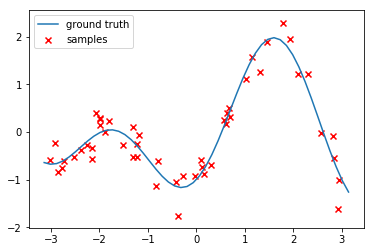

In [6]:
plt.plot(xs, ys, label="ground truth")
plt.scatter(observation_data, values_for_observation, marker="x", c="r", label="samples")
plt.legend()

# Finding parameters W

Our model will be simple Linear Regression model such as: $\hat{y}(x, W, b) = x * W + b$

In [7]:
data_input = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="data_input")
target_output = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="target_input")

with tf.variable_scope("linear_model", reuse=tf.AUTO_REUSE):

    W = tf.get_variable(name="w", shape=(1, 1), dtype=tf.float32, 
                        initializer=tf.initializers.random_normal())
    b = tf.get_variable(name="b", shape=(1, 1), dtype=tf.float32, 
                        initializer=tf.initializers.zeros())
    model_output = W * data_input + b
        
print(model_output)
print(data_input)

Instructions for updating:
Colocations handled automatically by placer.
Tensor("linear_model/add:0", shape=(?, 1), dtype=float32)
Tensor("data_input:0", shape=(?, 1), dtype=float32)


# Defining lost function

To measure how good our model is we would use the cost function called Mean Squered Error

$E = \frac{1}{2N}\lVert\overline{\textbf{y}} - \textbf{y}\rVert_2^2$

$\lVert \overline{\textbf{y}} - \textbf{y}\rVert_2$ is called Norm 2 <br>
In linear algebra, functional analysis, and related areas of mathematics, a norm is a function that assigns a strictly positive length or size to each vector in a vector space
<br>

$\lVert\textbf{x}\rVert_2 = \sqrt[2]{\sum_{n=1}^{N} x_n^2}$

In [8]:
with tf.name_scope("cost_function_linear"):
    cost_function = tf.losses.mean_squared_error(model_output, target_output)

Instructions for updating:
Use tf.cast instead.


# Model optimization 

To best fitting $W$  & $b$ parameters we have to find cost function minimum. To do so we will use Gradient Descent Optimization method. 

In [9]:
with tf.name_scope("optimizer_linear"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-3)
    optimization_step = optimizer.minimize(cost_function)

# Train the model

In [10]:
n_iteration_steps = 10_000
init = tf.global_variables_initializer()

In [11]:
with tf.Session() as sess:
    sess.run(init)

    for i in range(n_iteration_steps):

        current_loss, _ = sess.run([cost_function, optimization_step], feed_dict={
            data_input: observation_data,
            target_output: values_for_observation
        })
        

        if i % 2000 == 0:
            print(f"iteration: {i}, loss: {current_loss}")
            
    predictions = sess.run(model_output, feed_dict={data_input: xs})    

iteration: 0, loss: 3.508275032043457
iteration: 2000, loss: 0.6946381330490112
iteration: 4000, loss: 0.6946277618408203
iteration: 6000, loss: 0.6946277618408203
iteration: 8000, loss: 0.6946278214454651


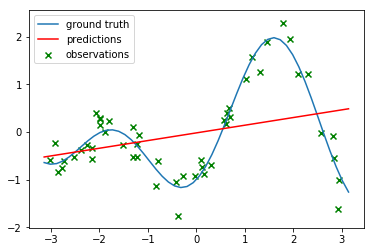

In [12]:
plt.plot(xs, ys, label="ground truth")
plt.plot(xs, predictions, c="r", label="predictions")
plt.scatter(observation_data, values_for_observation, marker="x", c="g", label="observations")
plt.legend()

As we can see our model doesn't perform really good. To find better solution we will have to use some more sphisticated model e.g. Polynomial regression.

# Polynomial Regression 

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.[2]

E.g:

$\hat{y}(x, W, b) =  w_1 * x + w_2 * x^2 + \dots + w^n*x^n$

# Design matrix $\Phi$

Design matrix $\Phi$ is matrix of values of explanatory variables of a set of objects. Depending on the definition it takes different forms e.g:
<br>
$\phi(x) = \begin{pmatrix}
x & x^2 & x^ 3x\\
\end{pmatrix}^T$
<br>
$\phi(x) = \begin{pmatrix}
1 & e^x & e^{2x} \\
\end{pmatrix}^T$
<br>
Where $x$ is the vector of observations $x_n$
<h3> Example: </h3>

$ x = \begin{bmatrix}
           1 \\ 2 \\ 3 
         \end{bmatrix} $

$\phi(x) = \begin{pmatrix}
x & x^2 & x^3\\
\end{pmatrix}^T \quad \; \; \Phi=\begin{bmatrix}
       1 & 1 & 1\\
       2 & 4 & 8\\
       3 & 9 & 27\\
     \end{bmatrix}$ 

$\phi(x) = \begin{pmatrix}
1 & e^x & e^{2x} \\
\end {pmatrix}^T \quad \Phi=\begin{bmatrix}
       1 & e^1 & e^2 \\
       1 & e^2 & e^4 \\
       1 & e^3 & e^6 \\
     \end{bmatrix}$
     
<br>
In our example I would use <b>only first form<b> of polynomial matrix


In [13]:
def design_matrix(x_train, degree_of_polynomial):
    '''
    :param x_train: vector of input values Nx1
    :param degree_of_polynomial: degree of polynomial e.g. 1,2,...
    :return: Design Matrix X_train for polynomial degree of M
    '''
    matrix = np.array([x_train ** i for i in range(1, degree_of_polynomial + 1)]).T

    return matrix[0]


### Example

In [14]:
a = np.array([1,2,3])
a = np.reshape(a, (3,1))

print("Input vector: \n", a)
print()
print ("Design matrix: \n", design_matrix(a, degree_of_polynomial = 4))
print ("Design shape: \n", design_matrix(a, 4).shape)

Input vector: 
 [[1]
 [2]
 [3]]

Design matrix: 
 [[ 1  1  1  1]
 [ 2  4  8 16]
 [ 3  9 27 81]]
Design shape: 
 (3, 4)


# Hyperparameters

In [15]:
degree_of_polynomial = 4
lambda_parameter = 1e-4
learning_rate = 1e-4
n_iteration_steps = 50_000

# Transforming data

Our new model will be polynomial (non-linear) model, so we need to transform our data. Insead of signle dim data, now we will expand it using Design Matrix $\Phi$

In [16]:
observation_data_design_matrix = design_matrix(observation_data, degree_of_polynomial)
xs_design_matrix = design_matrix(xs, degree_of_polynomial)

# Finding parameters W

Our new model will be Polynomial regression Regression model such as $X * W = \textbf{Y}$

Where:

$X$ is Design matrix of size (N,$d_1$)<br>
$W$ is matrix of weights, $\colon \mathbb{R}^{d_1} \rightarrow \mathbb{R}^{d_2}$<br>
$Y$ is result matrix of a size (N, $d_2$), in our example $d_2$ will be just 1

In [17]:
data_input = tf.placeholder(dtype=tf.float32, shape=(None, degree_of_polynomial), name="data_input")
target_output = tf.placeholder(dtype=tf.float32, shape=(None, 1), name="target_input")

In [18]:
with tf.variable_scope("polynomial_model", reuse=tf.AUTO_REUSE):
    W = tf.get_variable(name="w", shape=(degree_of_polynomial, 1), dtype=tf.float32,
                        initializer=tf.initializers.random_normal())
    b = tf.get_variable(name="b", shape=(1, 1), dtype=tf.float32,
                        initializer=tf.initializers.random_normal())
    
    model_output = tf.linalg.matmul(data_input, W) + b


# Cost function 

As a cost function we will again use MSE, but this time to avoid overfitting we will add Tikhonov Regularization [3] 

In [19]:
tikhonov_regularization = lambda_parameter * tf.math.reduce_sum(W)

with tf.name_scope("cost_function_polynomial"):
    cost_function = tf.losses.mean_squared_error(model_output, target_output) + tikhonov_regularization

# Optimization

Again we will optimize parameters using Gradient Descent

In [20]:
with tf.name_scope("optimizer_polynomial"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    optimization_step = optimizer.minimize(cost_function)

In [21]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for i in range(n_iteration_steps):
        current_loss, _ = sess.run([cost_function, optimization_step],
                                   feed_dict={
                                       data_input: observation_data_design_matrix,
                                       target_output: values_for_observation
                                   })

        if i % 5000 == 0:
            print(f"iteration: {i}, loss: {current_loss}")
            
        predictions = sess.run(model_output, feed_dict={data_input: xs_design_matrix})

iteration: 0, loss: 1450.1702880859375
iteration: 5000, loss: 0.24354974925518036
iteration: 10000, loss: 0.19114713370800018
iteration: 15000, loss: 0.16842803359031677
iteration: 20000, loss: 0.15550565719604492
iteration: 25000, loss: 0.14776214957237244
iteration: 30000, loss: 0.14297667145729065
iteration: 35000, loss: 0.1399555802345276
iteration: 40000, loss: 0.13802103698253632
iteration: 45000, loss: 0.1367703378200531


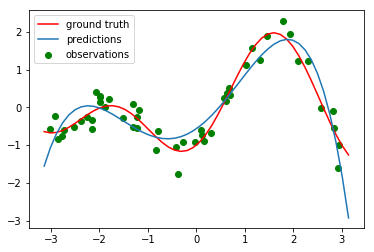

In [22]:
plt.scatter(observation_data, values_for_observation, c="g", label="observations")
plt.plot(xs, ys, c="r", label="ground truth")
plt.plot(xs, predictions, label="predictions")
plt.legend()
plt.show()

As we can see, new model works much better

# Sources

[1] Frank Noe Deep Learning Lectures FU Berlin Sommer Semester 2019<br>
[2] https://en.wikipedia.org/wiki/Polynomial_regression<br>
[3] https://en.wikipedia.org/wiki/Tikhonov_regularization
